<a href="https://colab.research.google.com/github/Sulmon/Deep-Learning/blob/dev_branch/SimpleDenseNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Problem**
We are still focusing on the problem of image classification of handwritten digit. We will start with the simplest possible approach for image classification:***Fully connected neural network*** also known as ***perceptron***



In [1]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
!pip list -v | grep [pytorchcv]

Package                       Version                Location                               Installer
absl-py                       1.4.0                  /usr/local/lib/python3.8/dist-packages pip
aeppl                         0.0.33                 /usr/local/lib/python3.8/dist-packages pip
aesara                        2.7.9                  /usr/local/lib/python3.8/dist-packages pip
aiohttp                       3.8.3                  /usr/local/lib/python3.8/dist-packages pip
aiosignal                     1.3.1                  /usr/local/lib/python3.8/dist-packages pip
alabaster                     0.7.13                 /usr/local/lib/python3.8/dist-packages pip
albumentations                1.2.1                  /usr/local/lib/python3.8/dist-packages pip
altair                        4.2.2                  /usr/local/lib/python3.8/dist-packages pip
appdirs                       1.4.4                  /usr/local/lib/python3.8/dist-packages pip
arviz                         0.12

In [12]:
!pip uninstall pytorchcvyy

Found existing installation: pytorchcv 0.0.67
Uninstalling pytorchcv-0.0.67:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/pytorchcv-0.0.67.dist-info/*
    /usr/local/lib/python3.8/dist-packages/pytorchcv/*
Proceed (Y/n)? y
  Successfully uninstalled pytorchcv-0.0.67


In [13]:
!wget https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py

--2023-02-12 17:19:00--  https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6540 (6.4K) [text/plain]
Saving to: ‘pytorchcv.py.2’

pytorchcv.py.2      100%[===================>]   6.39K  --.-KB/s    in 0s      

2023-02-12 17:19:00 (59.3 MB/s) - ‘pytorchcv.py.2’ saved [6540/6540]



In [2]:
#importing necessary libraries
#pytorchCV help us upload data in the right format for Network training: This is a collection of image classification, segmentation, detection, and pose estimation models.

import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
#similar to Tensorflow's model.summary(), helps visualize and debug networks
from torchinfo import summary
#from pytorchcv import load_mnist,plot_results clearly not working

In [3]:
from torchvision.transforms import ToTensor
data_train = torchvision.datasets.MNIST(
    root = '/data',
    download = True,
    train = True,
    transform = ToTensor()
)

data_test = torchvision.datasets.MNIST(
    root = '/data',
    download = True,
    train = False,
    transform = ToTensor()
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /data/MNIST/raw/train-images-idx3-ubyte.gz to /data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /data/MNIST/raw/train-labels-idx1-ubyte.gz to /data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /data/MNIST/raw/t10k-images-idx3-ubyte.gz to /data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /data/MNIST/raw



###Fully-connected dense neural networks


A basic **neural network** in pytorch consist fo a number of **layers**. The simplest network would incluse just one fully conncted layer , which is called **Linear Layer**, with 784 inputs (one input for each pixel of the input image) and 10 output (one output for each class)


As we discussed above, the dimension of our digit images is  1×28×28 , i.e. each image contains  28×28=784 different pixels. Because linear layer expects its input as one-dimensional vector, we need to insert another layer into the network, called Flatten, to change input tensor shape from 1×28×28  to 784.

After Flatten, there is a main linear layer (called Dense in PyTorch terminology) that converts 784 inputs to 10 outputs - one per class. We want  
n -th output of the network to return the probability of the input digit being equal to n. This basically means is that the inputs of the dense layers are pixels and the output of the dense layer are probabilities. The layer here is actually the mesh of connections between input and output.

Because the output of a fully-connected layer is not normalized to be between 0 and 1, it cannot be thought of as probability. Moreover, if want outputs to be probabilities of different digits, they all need to add up to 1. To turn output vectors into probability vector, a function called **Softmax** is often used as the last activation function in a classification neural network. For example,  
softmax([−1,1,2])=[0.035,0.25,0.705].
What **Softmax** does is take a list of output and transform them into a list of probabilities(probab distribution function)


In PyTorch, we often prefer to use **LogSoftmax** function, which will also compute logarithms of output probabilities. To turn the output vector into the actual probabilities, we need to take torch.exp of the output. *Why is the logarithm of the probabilies preferred?*

In [4]:
#Defining our network
net = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784,10), #784 inputs, 10 outputs
    nn.LogSoftmax()
)

A network defined in this way can take any digit as input and produce a vector of probabilities as an output. Let's see how this network performs by giving it a digit from our dataset

In [5]:
print("Digit to be predicted: " , data_train[0][1])
output_layer = torch.exp(net(data_train[0][0]))
output_layer

Digit to be predicted:  5


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/container.py:204: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


tensor([[0.0990, 0.1161, 0.1075, 0.0920, 0.1166, 0.1078, 0.0803, 0.1245, 0.0638,
         0.0925]], grad_fn=<ExpBackward0>)

Because we use LogSoftmax as final activation of our network, we pass network output through torch.exp to get probabilities. the network predicts similar probabilities for each digit. This is because it has not been trained on how to recognize the digits. We need to give it our training data to train it on our dataset.

To train the model we will need to create batches from our dataset of a certain size, let's say 64. PyTorch has an object called DataLoader that can create batches of our data for us automatically:

In [6]:
train_loader = torch.utils.data.DataLoader(data_train,batch_size=64)
#we can use larger batch_size for testing, since it's just summing an evaluating
test_loader = torch.utils.data.DataLoader(data_test,batch_size=128)

##**Training Process**

The training  process steps are as follows:
 - We take a mininatch from the input dataset, which consist of input data(feature) and expected result(label)
 - We calculate the predicted result for this minibatch
 - The difference between this predicted result and the real labels(expected result) of the minibatch is calculated using the loss function. The loss function shows how different the output of the network is from the expected output. The goal of our training is to minimize the loss.
 - we calculate the gradient of this loss function with respect to the model weights (parameter), which are  then used to adjust the weights to optimize the performance of the network. The amount of adjustment is controlled by a parameter called the **learning rate**, and the details of optimization algorithm are defined in the **optimizer** object
 - we repeat those steps untill the whole dataset is processed.One complete pass through the dataset is called **an epoch**

In [7]:
from prompt_toolkit.output.vt100 import Output
#function that performs one epoch training/ Training Loop

def train_epoch(net,dataloader,lr=0.01, optimizer=None,loss_fn=nn.NLLLoss()):
  optimizer = optimizer or torch.optim.Adam(net.parameters(),lr=lr)
  net.train()
  total_loss,acc,count=0,0,0

  for features,labels in dataloader:
    optimizer.zero_grad()
    out = net(features)
    #print(out)
    loss = loss_fn(out,labels) #cross_entropy(out,labels)
    loss.backward() #optimize the weights/ calling the optimizer
    optimizer.step()
    total_loss += loss
    _,predicted = torch.max(out,1)#produces a tuple with the maximum together with its indice. 
    #print(predicted) 
    acc+=(predicted==labels).sum() #output is compared with label
    count+=len(labels)
  return total_loss.item()/count, acc.item()/count

train_epoch(net,train_loader)

(0.005927326456705729, 0.89335)

The function takes the following parameters:

- **Neural network**
- **DataLoader** which defines the data to train on in minibatches
- **Loss Function**, which is a function that measures the difference between the expected result and the one produced by the network.
In most of the classification tasks NLLLoss is used, so we will make it a default.
-**Optimizer**, which defined an optimization algorithm. The most traditional algorithm is stochastic gradient descent, but we will use a more advanced version called Adam by default.
-**Learning rate** defines the speed at which the network learns. During learning, we show the same data multiple times, and each time weights are adjusted. If the learning rate is too high, new values will overwrite the knowledge from the old ones, and the network would perform badly. If the learning rate is too small it results in a very slow learning process.


here is what we do when training
- Switch the network to training mode (net.train())
- Go over all batches in the dataset, and for each batch do the following:
    - compute predictions made by the network on this batch (out)
    - compute loss, which is the discrepancy between predicted and expected values
    - try to minimize the loss by adjusting weights of the network (optimizer.step())
    - compute the number of correctly predicted cases (accuracy)- 


The function calculates and returns the average loss per data item, and training accuracy (percentage of cases guessed correctly). By observing this loss during training we can see whether the network is improving and learning from the data provided.

It is also important to control the accuracy on the test dataset (also called validation accuracy). A good neural network with a lot of parameters can predict with decent accuracy on any training dataset, but it may poorly generalize to other data. That's why in most cases we set aside part of our data, and then periodically check how well the model performs on them. Here is the function to evaluate the network on test dataset:

In [8]:
output = torch.tensor([[-9.2491e+00, -2.5006e+01, -1.0071e+01, -1.7095e+01, -4.9578e-03,
         -1.2524e+01, -6.9332e+00, -8.3594e+00, -8.4668e+00, -5.6887e+00],
        [-3.5888e+01, -5.4708e+01, -3.7948e+01, -2.0568e+01, -3.6885e+01,
         -2.0782e+01, -4.8444e+01, -4.7684e-07, -2.4562e+01, -1.4666e+01],
        [-1.1225e+01, -8.7756e+00, -3.6962e+00, -4.9507e+00, -8.7494e+00,
         -6.0843e+00, -1.3895e+01, -1.3421e+01, -3.7623e-02, -6.0234e+00],
        [-1.6569e+01, -2.4067e+01, -1.4415e+01, -1.1506e+01, -9.1833e+00,
         -9.3837e+00, -1.5841e+01, -4.6587e+00, -7.0496e+00, -1.0600e-02],
        [-2.2707e-04, -3.4867e+01, -9.1716e+00, -1.2371e+01, -2.5050e+01,
         -9.0669e+00, -1.6277e+01, -1.9303e+01, -1.2943e+01, -1.3894e+01],
        [-1.9041e+01, -2.5999e-03, -6.9193e+00, -6.9053e+00, -1.8584e+01,
         -9.9499e+00, -1.0073e+01, -1.0976e+01, -7.7349e+00, -9.7010e+00],
        [-1.5395e+01, -2.7796e+01, -2.5034e-06, -1.7508e+01, -3.2397e+01,
         -1.8563e+01, -1.7345e+01, -3.5559e+01, -1.2993e+01, -2.3517e+01],
        [-1.7804e+01, -2.5416e+01, -7.5113e+00, -2.6652e-03, -3.6180e+01,
         -1.1668e+01, -6.1629e+00, -5.0397e+01, -1.8501e+01, -4.2716e+01],
        [-1.3280e+01, -1.6205e+01, -9.3545e+00, -1.3316e+01, -1.4414e-02,
         -8.9028e+00, -5.0319e+00, -8.6906e+00, -6.8825e+00, -5.0570e+00],
        [-7.6593e+00, -8.9592e+00, -1.2835e+00, -3.2985e+00, -1.1915e+01,
         -3.8934e-01, -9.6734e+00, -1.7743e+01, -4.8496e+00, -1.2998e+01],
        [-2.6162e+01, -1.5347e+01, -1.1609e+01, -1.3155e+01, -2.3301e+01,
         -1.4584e+01, -1.7404e-05, -3.6056e+01, -1.2075e+01, -2.0368e+01],
        [-2.0131e+01, -3.3215e+01, -1.9570e+01, -8.4138e+00, -2.5798e+01,
         -1.3336e+01, -3.7832e+01, -4.6135e-04, -1.6596e+01, -8.3441e+00],
        [-1.2271e+01, -7.2287e+00, -2.5704e+00, -5.1415e+00, -1.1781e+01,
         -8.3842e+00, -8.4914e+00, -1.8795e+01, -8.7402e-02, -8.7125e+00],
        [-1.8512e+01, -2.1325e+01, -1.2821e+01, -6.7576e+00, -6.0144e+00,
         -6.8513e+00, -1.8080e+01, -2.6201e+00, -7.3232e+00, -8.1338e-02],
        [-1.2594e-03, -3.7524e+01, -1.3001e+01, -1.0002e+01, -2.4934e+01,
         -6.7217e+00, -3.5961e+01, -1.4595e+01, -1.4063e+01, -1.2165e+01],
        [-1.7395e+01, -7.3995e-03, -5.0331e+00, -8.2157e+00, -1.6531e+01,
         -1.0624e+01, -9.9477e+00, -1.2806e+01, -7.5914e+00, -1.2539e+01],
        [-1.9985e+01, -3.8906e+01, -4.0531e-06, -1.7084e+01, -2.5454e+01,
         -2.0514e+01, -1.8225e+01, -3.6163e+01, -1.2423e+01, -1.8182e+01],
        [-1.9590e+01, -2.5701e+01, -1.3956e+01, -3.9338e-05, -3.1721e+01,
         -1.0166e+01, -2.2167e+01, -1.8196e+01, -2.0519e+01, -1.6305e+01],
        [-1.0714e+01, -1.8172e+01, -7.7789e+00, -1.2503e+01, -3.2609e-02,
         -7.3122e+00, -6.5705e+00, -5.3056e+00, -5.8235e+00, -3.8328e+00],
        [-1.0708e+01, -1.6084e+01, -1.1109e+01, -9.9328e+00, -1.4832e+01,
         -3.8719e-03, -6.7992e+00, -2.9028e+01, -5.9282e+00, -1.8160e+01],
        [-2.5278e+01, -2.6391e+01, -9.4652e+00, -2.1885e+01, -1.8088e+01,
         -1.8594e+01, -7.7483e-05, -2.7937e+01, -1.9808e+01, -2.3935e+01],
        [-3.5310e+01, -4.7818e+01, -3.5637e+01, -2.6354e+01, -3.7891e+01,
         -2.4741e+01, -4.7829e+01, -2.3842e-07, -2.6356e+01, -1.5207e+01],
        [-9.5458e+00, -3.5981e+01, -1.3709e+01, -1.7225e+01, -1.4997e+01,
         -5.8243e+00, -1.9398e+01, -3.7039e+00, -2.9768e+00, -8.1873e-02],
        [-7.2865e+00, -3.2932e+01, -1.3329e+01, -2.0864e+01, -5.5323e+00,
         -1.3102e+01, -9.0295e+00, -7.0493e+00, -6.0167e+00, -8.1035e-03],
        [-2.6255e+01, -4.3552e+01, -2.2368e+01, -7.5697e+00, -3.0083e+01,
         -1.3563e+01, -4.4995e+01, -7.2250e-04, -1.7981e+01, -8.4919e+00],
        [-9.7875e-03, -3.2153e+01, -5.5459e+00, -1.1431e+01, -2.9505e+01,
         -1.1012e+01, -5.1485e+00, -2.8245e+01, -1.3881e+01, -2.6763e+01],
        [-2.3933e+01, -2.3567e+01, -1.0044e+01, -2.1143e+01, -1.8827e+01,
         -1.8562e+01, -4.3391e-05, -3.4469e+01, -1.8896e+01, -2.4072e+01],
        [-3.8861e-05, -3.1681e+01, -1.0394e+01, -1.4147e+01, -3.1779e+01,
         -1.1865e+01, -1.4482e+01, -3.2602e+01, -1.7444e+01, -2.4478e+01],
        [-2.3372e+01, -2.4634e+01, -1.6652e+01, -1.1921e+01, -2.2137e+01,
         -1.9256e+01, -3.7981e+01, -7.0380e-04, -1.7150e+01, -7.2692e+00],
        [-1.5563e+01, -9.0386e+00, -1.0068e+01, -1.7129e-04, -2.9670e+01,
         -1.1570e+01, -1.5292e+01, -3.0373e+01, -1.4826e+01, -2.6433e+01],
        [-1.9538e+01, -2.9891e+01, -1.5307e+01, -8.4044e+00, -2.2946e+01,
         -1.1885e+01, -3.1576e+01, -2.4852e-04, -1.6383e+01, -1.0961e+01],
        [-1.9770e+01, -2.2250e+01, -8.2689e+00, -2.7188e-04, -2.5059e+01,
         -1.3713e+01, -2.0195e+01, -2.7329e+01, -1.1155e+01, -1.6372e+01],
        [-2.0915e+01, -3.7150e+01, -2.1064e+01, -1.0836e+01, -2.6940e+01,
         -1.0982e+01, -3.8572e+01, -1.3863e-04, -1.5462e+01, -9.1938e+00],
        [-1.6137e+01, -2.4010e+01, -1.0900e+01, -1.2565e+01, -6.8245e+00,
         -1.1538e+01, -1.1709e+01, -6.6174e+00, -7.4208e+00, -3.0671e-03],
        [-2.1089e+01, -1.4409e+01, -1.2241e+01, -1.0172e+01, -2.2318e+01,
         -2.0288e+01, -3.3997e+01, -5.0925e-04, -1.5699e+01, -7.6728e+00],
        [-1.1876e+01, -2.5322e+01, -9.3677e+00, -1.7867e+01, -6.4037e-02,
         -9.9334e+00, -2.8091e+00, -9.4335e+00, -8.2337e+00, -6.6585e+00],
        [-9.5318e-03, -2.6574e+01, -4.6670e+00, -1.5221e+01, -3.3641e+01,
         -1.4776e+01, -9.3750e+00, -2.9563e+01, -1.4157e+01, -2.9580e+01],
        [-2.1562e+01, -4.6471e+01,  0.0000e+00, -1.7570e+01, -3.6054e+01,
         -2.2534e+01, -2.3459e+01, -5.3665e+01, -2.2205e+01, -3.6872e+01],
        [-2.4710e+01, -2.6004e+01, -9.8300e+00, -2.1279e+01, -1.7323e+01,
         -1.4548e+01, -5.4239e-05, -3.0668e+01, -1.7915e+01, -2.9649e+01],
        [-1.2537e+01, -1.4249e+01, -3.0761e+00, -5.2457e+00, -1.4939e+01,
         -2.8728e+00, -1.1705e-01, -3.4176e+01, -5.9883e+00, -1.9514e+01],
        [-1.2652e+01, -1.3600e+01, -1.0896e+01, -1.6288e+01, -1.7645e+01,
         -1.8201e+01, -1.9167e-04, -2.4967e+01, -8.7187e+00, -1.2179e+01],
        [-2.2980e+01, -1.8828e+01, -9.5143e+00, -7.8386e+00, -2.1787e+01,
         -4.0389e+00, -1.8251e-02, -3.9919e+01, -1.7074e+01, -3.5595e+01],
        [-1.0766e+01, -2.2028e+01, -1.2542e-03, -1.1604e+01, -1.7961e+01,
         -1.5066e+01, -1.3769e+01, -8.5913e+00, -1.0748e+01, -6.8932e+00],
        [-1.1886e+01, -1.7824e+01, -7.0373e+00, -9.2438e+00, -1.0341e+01,
         -5.9859e+00, -1.3730e+01, -3.8416e+00, -5.5251e+00, -2.9402e-02],
        [-5.3526e+00, -4.8621e+00, -3.5554e+00, -5.9616e+00, -1.3291e+01,
         -6.6831e-02, -9.2850e+00, -2.2309e+01, -3.8663e+00, -1.7408e+01],
        [-1.9876e+01, -3.3050e+01, -1.3249e+01, -3.1590e-05, -3.9242e+01,
         -1.0423e+01, -2.5494e+01, -3.6688e+01, -1.8734e+01, -2.9529e+01],
        [-1.4181e+01, -2.7830e+01, -1.5224e+01, -1.5096e+01, -1.0638e+01,
         -1.4446e+01, -1.6906e+01, -4.8485e+00, -7.0627e+00, -8.7607e-03],
        [-8.7853e+00, -3.3065e+01, -1.5759e+01, -3.7815e+01, -1.8659e+01,
         -6.3646e+00, -1.5676e+01, -1.0267e+01, -6.6512e-03, -5.3560e+00],
        [-2.1486e+01, -2.6670e+01, -1.5004e+01, -4.2915e-06, -3.6361e+01,
         -1.2463e+01, -1.6038e+01, -5.0570e+01, -1.9351e+01, -3.7056e+01],
        [-6.1544e+00, -2.3361e+01, -7.8878e+00, -1.7121e+01, -1.2842e-01,
         -9.5413e+00, -6.3102e+00, -3.4306e+00, -3.9949e+00, -2.7280e+00],
        [-7.5217e-04, -3.1550e+01, -9.5103e+00, -8.2656e+00, -2.4300e+01,
         -7.7888e+00, -1.6632e+01, -2.8948e+01, -1.1993e+01, -1.6691e+01],
        [-2.9123e+00, -1.5556e+01, -4.1357e+00, -6.8475e+00, -1.0096e+01,
         -7.5418e-02, -9.8176e+00, -1.0657e+01, -6.7915e+00, -1.4787e+01],
        [-1.6169e+01, -2.0677e+01, -9.0580e+00, -1.6433e+01, -1.2263e-01,
         -1.1094e+01, -2.1622e+00, -1.2327e+01, -1.0737e+01, -8.6213e+00],
        [-1.1121e+01, -2.3099e+01, -8.1272e+00, -1.1458e+01, -1.3395e+01,
         -7.0787e+00, -1.1714e-03, -2.1081e+01, -1.2112e+01, -1.7497e+01],
        [-1.8797e+01, -2.3780e+01, -7.5879e+00, -4.6328e-03, -2.4384e+01,
         -1.0869e+01, -3.0954e+01, -1.3427e+01, -1.1640e+01, -5.5001e+00],
        [-1.2584e+01, -7.8905e+00, -7.5281e+00, -7.2308e+00, -2.6012e-02,
         -6.0239e+00, -6.4685e+00, -7.7636e+00, -4.3588e+00, -4.9840e+00],
        [-1.6578e+01, -1.2562e+01, -6.0041e+00, -6.7711e+00, -9.1578e+00,
         -1.0427e+01, -1.0338e+01, -1.8265e+01, -3.8580e-03, -9.6489e+00],
        [-1.6090e-03, -2.6485e+01, -9.4029e+00, -8.8794e+00, -1.9130e+01,
         -6.7776e+00, -8.9687e+00, -2.0317e+01, -9.1763e+00, -1.1033e+01],
        [-5.5085e+00, -1.3316e+01, -6.7662e+00, -8.1429e+00, -1.1641e+01,
         -4.4586e+00, -1.8216e-02, -2.1125e+01, -6.9424e+00, -1.3642e+01],
        [-4.1359e+00, -2.0059e+01, -6.8932e+00, -1.2622e+01, -7.2384e-02,
         -8.0617e+00, -5.9197e+00, -4.8055e+00, -5.6650e+00, -3.2657e+00],
        [-1.9301e+01, -1.7099e+01, -9.2553e+00, -4.9593e+00, -1.3721e+01,
         -8.7898e+00, -2.0972e+01, -5.4649e+00, -7.7380e-01, -6.4009e-01],
        [-2.1290e+01, -2.0515e-03, -6.4418e+00, -8.6765e+00, -1.4431e+01,
         -1.1418e+01, -1.0557e+01, -9.1833e+00, -9.1295e+00, -1.0216e+01],
        [-2.4313e+01, -2.7297e+01, -1.1803e+01, -7.8678e-06, -2.8113e+01,
         -1.5106e+01, -3.0054e+01, -3.2251e+01, -1.6148e+01, -2.3549e+01],
        [-1.4399e+01, -1.7877e+01, -7.1552e+00, -1.3817e+01, -2.3891e-02,
         -8.1724e+00, -3.9529e+00, -1.2569e+01, -6.1214e+00, -6.7732e+00]])


In [9]:
output.shape

torch.Size([64, 10])

In [10]:
#above is the output of one batch we see that it outputs 64 vectors of length 10
# if we perform the argmax of this it gives us for each of those vector an the argmax sothat we get a vector of length 64 ---- result for the batch! prediction for each images in the batch 
output.argmax(1)

tensor([4, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 9, 9,
        7, 0, 6, 0, 7, 3, 7, 3, 7, 9, 7, 4, 0, 2, 6, 6, 6, 6, 2, 9, 5, 3, 9, 8,
        3, 4, 0, 5, 4, 6, 3, 4, 8, 0, 6, 4, 9, 1, 3, 4])

In [11]:
torch.max(output,1)[1]

tensor([4, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 9, 9,
        7, 0, 6, 0, 7, 3, 7, 3, 7, 9, 7, 4, 0, 2, 6, 6, 6, 6, 2, 9, 5, 3, 9, 8,
        3, 4, 0, 5, 4, 6, 3, 4, 8, 0, 6, 4, 9, 1, 3, 4])

In [12]:
def validate(net, dataloader,loss_fn = nn.NLLLoss()):
  net.eval()
  count,acc,loss=0,0,0
  with torch.no_grad():
    for features,labels in dataloader:
      out=net(features)
      loss+=loss_fn(out,labels)
      pred=torch.max(out,1)[1] # or (_,pred = torch.max(out,1) or out.argmax(1)))
      acc+=(pred==labels).sum()
      count+=len(labels)
    return loss.item()/count, acc.item()/count
validate(net,test_loader)

(0.002941293716430664, 0.8937)

##**Overfitting**

Normally when training a neural network, we train the model for several epochs observing training and validation accuracy. In the beginning, both training and validation accuracy should increase, as the network picks up the patterns in the dataset. However, at some point it can happen that training accuracy increases while validation accuracy starts to decrease. That would be an indication of overfitting, that is model does well on your training dataset, but not on new data.

Below is the training function that can be used to perform both training and validation. It prints the training and validation accuracy for each epoch, and also returns the history that can be used to plot the loss and accuracy on the graph.


In [13]:
from torch.nn.modules.loss import NLLLoss
#training and validation in one function

def train(net,train_loader,test_loader,epochs=5, lr=0.01,optimizer=None,loss_fn=NLLLoss()):
  optimizer = optimizer or torch.optim.Adam(lr=lr,params=net.parameters())
  res = {'train_accs':[],'train_losses':[],'val_accs':[],'val_losses':[] }
  for e in range(epochs):
    tl,ta = train_epoch(net,train_loader,optimizer=optimizer,lr=lr,loss_fn=loss_fn)
    vl,va = validate(net,test_loader,loss_fn=loss_fn)
    print(f'Epoch{e:2}, Train accuracy = {ta:.3f}, Train loss = {tl:.3f}, Validation accuracy = {va:.3f}, Validation loss = {vl:.3f}')
    res['train_accs'].append(ta)
    res['train_losses'].append(tl)
    res['val_accs'].append(va)
    res['val_losses'].append(vl)
  return res

In [14]:
#reinitialize the network to start from scratch

net = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784,10), #784 inputs, 10 outputs
    nn.LogSoftmax()
)


hist = train(net,train_loader,test_loader,epochs=10)

Epoch 0, Train accuracy = 0.893, Train loss = 0.006, Validation accuracy = 0.893, Validation loss = 0.003
Epoch 1, Train accuracy = 0.910, Train loss = 0.005, Validation accuracy = 0.899, Validation loss = 0.003
Epoch 2, Train accuracy = 0.913, Train loss = 0.005, Validation accuracy = 0.899, Validation loss = 0.003
Epoch 3, Train accuracy = 0.915, Train loss = 0.005, Validation accuracy = 0.898, Validation loss = 0.003
Epoch 4, Train accuracy = 0.917, Train loss = 0.005, Validation accuracy = 0.897, Validation loss = 0.003
Epoch 5, Train accuracy = 0.917, Train loss = 0.005, Validation accuracy = 0.895, Validation loss = 0.003
Epoch 6, Train accuracy = 0.918, Train loss = 0.005, Validation accuracy = 0.893, Validation loss = 0.003
Epoch 7, Train accuracy = 0.919, Train loss = 0.005, Validation accuracy = 0.892, Validation loss = 0.003
Epoch 8, Train accuracy = 0.919, Train loss = 0.005, Validation accuracy = 0.891, Validation loss = 0.003
Epoch 9, Train accuracy = 0.919, Train loss = 

This function logs messages with the accuracy on training and validation data from each epoch. It also returns this data as a dictionary (called history). We can then visualize this data to better understand our model training.

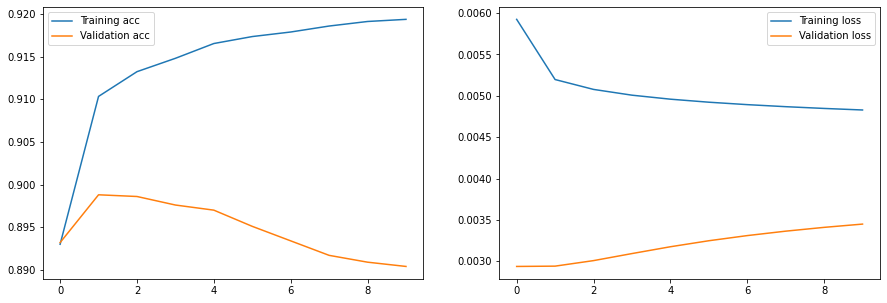

In [15]:
plt.figure(figsize = (15,5))

plt.subplot(121)
plt.plot(hist['train_accs'], label='Training acc')
plt.plot(hist['val_accs'], label='Validation acc')
plt.legend()

plt.subplot(122)
plt.plot(hist['train_losses'], label='Training loss')
plt.plot(hist['val_losses'], label='Validation loss')
plt.legend()

the diagram on the left shows the training accuracy increasing (which corresponds to the network learning to classify our training data better and better), while validation accuracy starts to fall. The diagram on the right show the training loss and validation loss, you can see the training loss decreasing (meaning its performing better) and the validation loss increasing (meaning its performing worse). These graphs would indicate the model is overfitted --- ***It is possible to take/save the model just befor the overfitting barrier?***

####**Visualizing network weights**


The Dense layer in our network is also calld linear, because it performs linear transformation of its input, which can be defined as $y=Wx+b$. Where W is the matrix of weights and b is tghe bias. Weights matrix W is in fact responsible for what out network can do,i.e for recognizing digits. It has size 784 X 10 --10 outputs for 1 input image.


Lets visualize our weights of our neural network and see what they look like. When the network is more complex than just one layer it can be a difficult to visualize the results like this, because in complex network weights do not make much sense when visualized. However, in our case each of 10 dimensions of weight matrix W correspond to individual digits, and thus can be visualized to see how the digit recognition takes place.

In the code below, we will 
first get the matrix W into weight_tensor variable. It can be obtained by 

*  calling the net.parameters() method (which returns both  
W  and  b )
*  Then calling next to get the first of two parameters.
*  Then we will go over each dimension, reshape it to  28×28 size
*  Plot. 

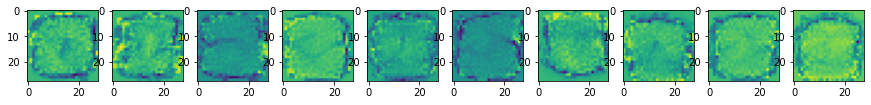

In [17]:
weight_tensor = next(net.parameters())
fig,ax = plt.subplots(1,10,figsize=(15,4))
for i,x in enumerate(weight_tensor):
  ax[i].imshow(x.view(28,28).detach())

 #### **Multi-layered perceptron**

To further increase accuracy, we may want to include one or more hidden layers.
An important thing to note here is the non-linear activation function between layers, called ReLU. It is important to introduce those non-linear activation functions, because they are one of the reasons neural networks achieve high expressive power.Indeed, it can be demonstrated mathematically that if a network consisted just of a series of linear layers, it would essentially be equivalent to one linear layer.Thus inserting non-linear functions in between layers is important!

ReLU is a simplest activation function, which is defined as follows:
$$
\mathrm{ReLU}(x) = \begin{cases} 0 & x<0 \\ x & x\ge0 \end{cases}
$$

Other activation functions used in deep learning are sigmoid and tanh, but ReLU is most often used in computer vision, because it can be quickly computed, and using other functions does not bring any significant benefits.

######**Redefinition of the the network**

In [18]:
net = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784,100), #784 inputs, 100 outputs
    nn.ReLU(), #Activation Function
    nn.Linear(100,10), # 100 inputs, 10 outputs
    nn.LogSoftmax(dim=0)
)

summary(net,input_size=(1,28,28))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [1, 10]                   --
├─Flatten: 1-1                           [1, 784]                  --
├─Linear: 1-2                            [1, 100]                  78,500
├─ReLU: 1-3                              [1, 100]                  --
├─Linear: 1-4                            [1, 10]                   1,010
├─LogSoftmax: 1-5                        [1, 10]                   --
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
Total mult-adds (M): 0.08
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.32
Estimated Total Size (MB): 0.32

Here we use summary() function to display a detailed layer-by-layer structure of a network with some other useful information. In particular, we can see:

Layer-by-layer structure of a network, and output size of each layer
Number of parameters of each layer, as well as for the whole network. The more parameters the network has, the more data samples it needs to be trained on without overfitting.


Let's see how the number of parameters is calculated.

*  First linear layer has 784 inputs and 100 outputs. The layer is defined by  
W1x+b1 , where W1 has size 784×100 , and  b1  - 100 .Thus total number of parameters for this layer is 784×100+100=78500
* Similarly, number of parameters for the second layer is 100×10+10=1010
* Activation functions, as well as Flatten layers do not have parameters.

There is another syntax that we can use to define the same network by using classes:

In [20]:
from torch.nn.functional import relu, log_softmax

class MyNet(nn.Module):
  def __init__ (self):
    super(MyNet, self).__init__()
    self.flatten = nn.Flatten()
    self.hidden = nn.Linear(784,100)
    self.out = nn.Linear(100,10)
    #log_softmax and relu are not defined as parameters of the class
  def forward(self,x):
    x=self.flatten(x)
    x=self.hidden(x)
    x=relu(x)
    x=self.out(x)
    x=log_softmax(x,dim=0)
    return x
net= MyNet()
summary(net,input_size=(1,28,28),device='cpu')


Layer (type:depth-idx)                   Output Shape              Param #
MyNet                                    [1, 10]                   --
├─Flatten: 1-1                           [1, 784]                  --
├─Linear: 1-2                            [1, 100]                  78,500
├─Linear: 1-3                            [1, 10]                   1,010
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
Total mult-adds (M): 0.08
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.32
Estimated Total Size (MB): 0.32

Class definition consists of two parts:

* In the **constructor** (__init__) we define all layers that our network will have. ****Those layers are stored as internal variables of the class***, and PyTorch will automatically know that parameters of those layers should be optimized when training. Internally, PyTorch uses parameters() method to look for all trainable parameters, and nn.Module will automatically collect all trainable parameters from all sub-modules.
* We define the **forward method** that does the forward pass computation of our neural network. In our case, we start with a parameter tensor x, and explicitly pass it through all the layers and activation functions, starting from flatten, up to final linear layer out. **When we apply our neural network to some input data x by writing out = net(x), the forward method is called**.


In fact, Sequential networks are represented in a very similar manner, they just store a list of layers and apply them sequentially during the forward pass. Here we have a chance to represent this process more explicitly, which eventually gives us more flexibility. ***That is one of the reasons that using classes for neural network definition is a recommended and preferred practice***.

In [25]:
#trying with the training with the new class definition

hist = train(net,train_loader,test_loader,epochs=5)
# from pytorchcv plot_results(hist)

Epoch 0, Train accuracy = 0.961, Train loss = 0.033, Validation accuracy = 0.950, Validation loss = 0.022
Epoch 1, Train accuracy = 0.962, Train loss = 0.033, Validation accuracy = 0.955, Validation loss = 0.022
Epoch 2, Train accuracy = 0.963, Train loss = 0.033, Validation accuracy = 0.956, Validation loss = 0.022
Epoch 3, Train accuracy = 0.965, Train loss = 0.032, Validation accuracy = 0.950, Validation loss = 0.022
Epoch 4, Train accuracy = 0.965, Train loss = 0.032, Validation accuracy = 0.957, Validation loss = 0.022


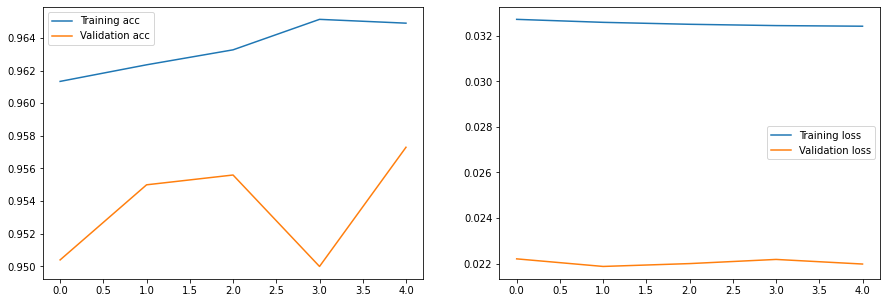

In [26]:
plt.figure(figsize = (15,5))

plt.subplot(121)
plt.plot(hist['train_accs'], label='Training acc')
plt.plot(hist['val_accs'], label='Validation acc')
plt.legend()

plt.subplot(122)
plt.plot(hist['train_losses'], label='Training loss')
plt.plot(hist['val_losses'], label='Validation loss')
plt.legend()

##Takeaway

Training a neural network in PyTorch can be programmed with a training loop. It may seem like a complicated process, but in real life we need to write it once, and we can then re-use this training code later without changing it.

We can see that a single-layer and multi-layer dense neural networks show relatively good performance, but if we try to apply them to real-world images, the accuracy will not be too high. In the next unit, we will introduce the concept of **convolutions**, which allow us to get much better performance for image recognition.  